<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Week 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from sklearn import metrics

# import 'is_string_dtype' to check the string type 
from pandas.api.types import is_string_dtype

#### Read the data

Load the csv file and print the first five observations.

In [3]:
df_bank = pd.read_csv('bank_churn.csv')

df_bank.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,0
2,502,France,Female,42,8,159660.80,3,1,1
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,0


Our objective is to predict whether the customer has closed the bank account or not.

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

In [4]:
df_bank.shape

(9920, 9)

In [5]:
df_bank.info()

#All Data Types Looks fine

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       9920 non-null   int64  
 1   Geography         9920 non-null   object 
 2   Gender            9920 non-null   object 
 3   Age               9920 non-null   int64  
 4   NumOfYrsWithBank  9920 non-null   int64  
 5   Balance           9920 non-null   float64
 6   NumOfProducts     9920 non-null   int64  
 7   HasCrCard         9920 non-null   int64  
 8   Closed_Acc        9920 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 697.6+ KB


In [7]:
df_bank.isnull().sum()

# There are no missing values

CreditScore         0
Geography           0
Gender              0
Age                 0
NumOfYrsWithBank    0
Balance             0
NumOfProducts       0
HasCrCard           0
Closed_Acc          0
dtype: int64

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the target variable imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df_bank['Closed_Acc'].value_counts()

0    7898
1    2022
Name: Closed_Acc, dtype: int64

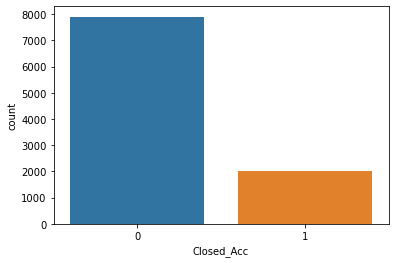

In [9]:
sns.countplot(df_bank['Closed_Acc'])
plt.show()

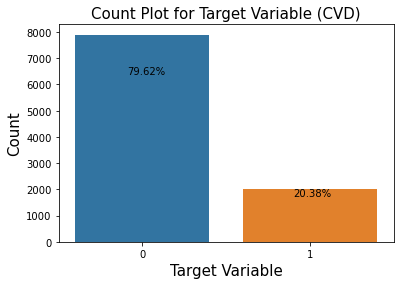

In [10]:
# consider only the target variable
df_target = df_bank['Closed_Acc']

# get counts of 0's and 1's in the 'Loan_Status' variable
df_target.value_counts()

# plot the countplot of the variable 'Loan_Status'
sns.countplot(x = df_target)

# use below code to print the percentage values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text to be printed
plt.text(x = -0.09, y = df_target.value_counts()[0] - 1500, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.90, y = df_target.value_counts()[1] - 300, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (CVD)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [11]:
# Yes the target variable is Imbalanced

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
df_num = df_bank.select_dtypes(include = np.number)
df_num = df_num.drop('Closed_Acc',axis=1)
df_cat = df_bank.select_dtypes(exclude = np.number)

num_scaled = df_num.apply(lambda x : (x - x.mean())/x.std())

encoded_data = pd.get_dummies(df_cat ,drop_first=True)

X = pd.concat([num_scaled,encoded_data],axis=1)

X = sm.add_constant(X)

Y = df_bank.Closed_Acc

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [14]:
log_reg = sm.Logit(y_train,X_train).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.441849
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                          Logit   Df Residuals:                     7926
Method:                           MLE   Df Model:                            9
Date:                Thu, 10 Mar 2022   Pseudo R-squ.:                  0.1239
Time:                        11:05:58   Log-Likelihood:                -3506.5
converged:                       True   LL-Null:                       -4002.6
Covariance Type:            nonrobust   LLR p-value:                8.439e-208
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4663      0.054    -26.940      0.000      -1.573      -1.360
CreditSc

In [15]:
df_odds = pd.DataFrame(data = np.exp(log_reg.params),columns=['Odds'])

df_odds

,Odds
const,0.230789
CreditScore,0.944645
Age,2.042853
NumOfYrsWithBank,0.986997
Balance,1.183648
NumOfProducts,0.939482
HasCrCard,0.981083
Geography_Germany,2.102382
Geography_Spain,0.988354
Gender_Male,0.578571


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
y_pred_prob = log_reg.predict(X_test)

y_pred = [0 if val < 0.25 else 1 for val in y_pred_prob]

cm = confusion_matrix(y_test,y_pred)

print(cm)
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

[[1269  303]
 [ 171  241]]


In [27]:
sensitivity = TP / (FN+TP)

sensitivity

0.5849514563106796

In [28]:
specificity = TN / (TN + FP)

specificity

0.8072519083969466

In [29]:
print('Sensitivity :',sensitivity)
print('Specificity :',specificity)

Sensitivity : 0.5849514563106796
Specificity : 0.8072519083969466


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1572
           1       0.44      0.58      0.50       412

    accuracy                           0.76      1984
   macro avg       0.66      0.70      0.67      1984
weighted avg       0.79      0.76      0.77      1984



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
rfe_model = RFE(estimator = LogisticRegression(),n_features_to_select=6)

rfe_model = rfe_model.fit(X_train,y_train)

rfe_df = pd.DataFrame(data = rfe_model.ranking_,index = X_train.columns,columns=['Ranking'])

rfe_df[rfe_df['Ranking']==1]

,Ranking
CreditScore,1
Age,1
Balance,1
NumOfProducts,1
Geography_Germany,1
Gender_Male,1


In [43]:
print(rfe_df[rfe_df['Ranking']==1].index)

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Geography_Germany',
       'Gender_Male'],
      dtype='object')


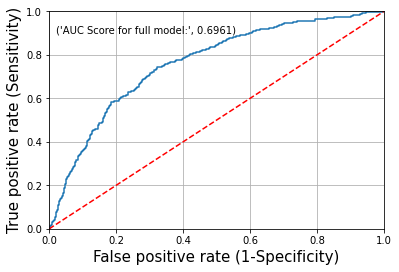

In [80]:
X_train_best_features =  X_train[['CreditScore','Age','Balance','NumOfProducts','Geography_Germany','Gender_Male']]

X_train_best_features = sm.add_constant(X_train_best_features)

X_test_best_features =  X_test[['CreditScore','Age','Balance','NumOfProducts','Geography_Germany','Gender_Male']]


log_reg_instance =  LogisticRegression()


log_reg_best_features = log_reg_instance.fit(X_train,y_train)

y_pred_prob = log_reg.predict(X_test)

y_pred = [0 if x < 0.25 else 1 for x in y_pred_prob]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')


# add plot and axes labels
# set text size using 'fontsize'
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for full model:',round(metrics.roc_auc_score(y_test, y_pred),4)))


                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:

fpr,tpr,thresholds = roc_curve(y_test,y_pred_py_pred_prob = log_reg.predict(X_test)
rob)

youdens_table = pd.DataFrame({'TPR' : tpr,'FPR':fpr,'Thresholds':thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

youdens_table.head()

,TPR,FPR,Thresholds,Difference
0,0.745146,0.324427,0.183503,0.420718
1,0.742718,0.323155,0.184295,0.419563
2,0.742718,0.324427,0.183828,0.418291
3,0.718447,0.301527,0.192675,0.416920
4,0.737864,0.321883,0.185403,0.415981


The above output shows that the maximum difference in TPR and FPR is corresponding to the cut-off value 0.183503. Thus, we can consider this value as the optimal value for cut-off.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
y_pred_prob = log_reg.predict(X_test)

y_pred = [0 if x < 0.18 else 1 for x in y_pred_prob]

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1572
           1       0.37      0.75      0.49       412

    accuracy                           0.68      1984
   macro avg       0.64      0.70      0.63      1984
weighted avg       0.80      0.68      0.71      1984



In [47]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred))

print('F1 Score :',f1_score(y_test,y_pred))

print('Kappa Score : ',cohen_kappa_score(y_test,y_pred))

Accuracy Score :  0.6809475806451613
F1 Score : 0.49238171611868486
Kappa Score :  0.2968273378394721


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

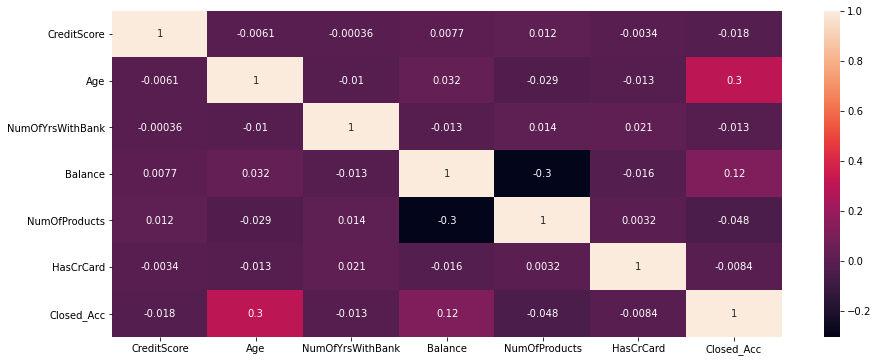

In [51]:
plt.figure(figsize=(15,6))
sns.heatmap(df_bank.corr(),annot=True)
plt.show()

In [52]:
# No Features are involved in Multi-Collinearity

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif =pd.DataFrame()
vif['Feature']= X_train.columns

vif['VIF_Score']  = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

vif.sort_values(ascending=False,by='VIF_Score')


,Feature,VIF_Score
0,const,3.284602
7,Geography_Germany,1.332539
4,Balance,1.325909
8,Geography_Spain,1.124782
5,NumOfProducts,1.113964
2,Age,1.004672
9,Gender_Male,1.002627
6,HasCrCard,1.001604
3,NumOfYrsWithBank,1.001082
1,CreditScore,1.000986


In [61]:
# All Features VIP is < 5 , There is no Multi -Collinearity among features

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also, plot the ROC curve and compute the AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
# This is more or like Building Full Model because No Models are involved in Multi-Collinearity

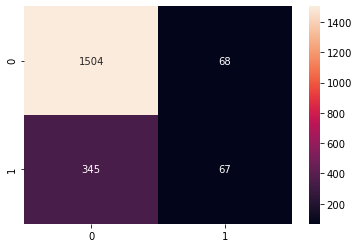

In [79]:
log_reg_8 = LogisticRegression()

log_reg_8_model = log_reg_8.fit(X_train,y_train)

y_pred_prob = log_reg_8_model.predict(X_test)

y_pred = [0 if x < 0.6 else 1 for x in y_pred_prob]

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt = 'd')
plt.show()

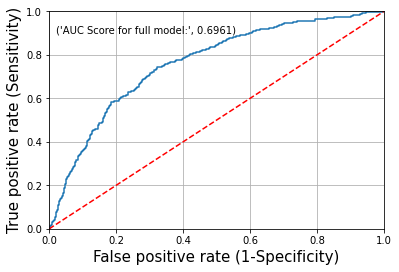

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')


# add plot and axes labels
# set text size using 'fontsize'
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for full model:',round(metrics.roc_auc_score(y_test, y_pred),4)))


                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
# define a function to calculate the total_cost for a cut-off value
# pass the actual values of y, predicted probabilities of y, cost for FN and FP
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    # pass the actual and predicted values to calculate the confusion matrix
    cm = confusion_matrix(actual_value, predicted_value)           
    
    # create an array of the confusion matrix
    cm_array = np.array(cm)
    
    # return the total_cost
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

# create an empty dataframe to store the cost for different probability cut-offs
df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

# initialize i to '0' corresponding to the 1st row in the dataframe
i = 0

# use for loop to calculate 'total_cost' for each cut-off probability value
# call the function 'calculate_total_cost' to calculate the cost
# pass the actual y-values
# calculate the predicted y-values from 'y_pred_prob' for the cut-off probability value
# assign the costs 2 and 0.4 to False Negatives and False Positives respectively
# add the obtained 'cut_off' and 'total_cost' at the ith index of the dataframe
for cut_off in range(10, 50):
    total_cost = calculate_total_cost(y_test,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 2, 0.5) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    
    # increment the value of 'i' for each row index in the dataframe 'df_total_cost'
    i += 1
    
# sort the dataframe based on the 'total_cost' in the ascending order
# print the first five rows in the dataframe
df_total_cost.sort_values('total_cost', ascending = True).head()

,cut-off,total_cost
9,0.19,472.0
8,0.18,474.0
10,0.20,480.0
7,0.17,480.0
11,0.21,488.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full logistic model using the optimal cut-off probability obtained in Q9. Also, plot the confusion matrix and ROC curve along with the AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
from matplotlib.colors import ListedColormap

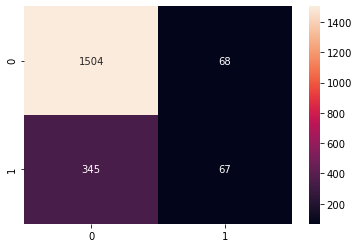

In [75]:
log_reg_10 = LogisticRegression()

log_reg_10_model = log_reg_10.fit(X_train,y_train)

y_pred_prob = log_reg_10_model.predict(X_test)

y_pred = [0 if x < 0.19 else 1 for x in y_pred_prob]

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt = 'd')
plt.show()

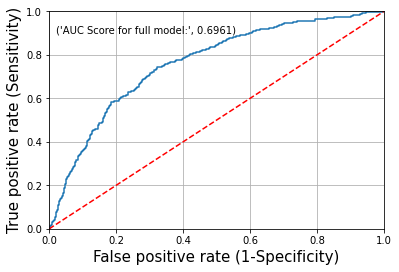

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')


# add plot and axes labels
# set text size using 'fontsize'
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for full model:',round(metrics.roc_auc_score(y_test, y_pred),4)))


                               
# plot the grid
plt.grid(True)